In [100]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from magnification_library import *

In [101]:
import sys
sys.path.append('../CLMM/examples/support')
import clmm
import clmm.modeling as mod
import clmm.utils as utils
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
from astropy.io import ascii
from scipy.optimize import curve_fit
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

In [102]:
#import cosmology
astropy_cosmology_object = FlatLambdaCDM(H0=71, Om0=1 - 0.734, Ob0=0.0)
cosmo_ccl = mod.cclify_astropy_cosmo(astropy_cosmology_object)

In [103]:
#https://arxiv.org/pdf/1509.05607.pdf

# Goal : reproduce https://arxiv.org/pdf/1111.3698.pdf

In [104]:
#define cluster parameters
density_profile_parametrization = 'nfw'
mass_Delta = 200
cluster_concentration = np.array((3., 3.5, 4))
cluster_mass = np.array((0.36, 1.7)) *1e14 
cluster_redshift = np.array((0.3, 1.0))

In [105]:
#define source parameters
source_redshift = np.array((3.1, 3.8, 4., 4.8))
mstar = np.array((-20.84, -20.84, -21.00, -20.94))
alpha = np.array((-1.6, -1.56, -1.26, -1.65))
fct = "schechter"

In [106]:
r3d = np.logspace(-2, 2, 1000)

In [107]:
#computation of the magnification per radius and redshift

conc_cl = cluster_concentration[1]
mass_cl = cluster_mass[1]
z_cl = cluster_redshift[1]
z_s = source_redshift[:]

print ("Compute magnification for cluster of mass", mass_cl/1e14, "x 1e14 Msun at redshift z =", z_cl, "with concentration", conc_cl)

mu_2d = np.zeros((r3d.size, z_s.size))

for i in range(z_s.size):
    mu_2d[:,i] = mod.predict_magnification(r3d*astropy_cosmology_object.h, mdelta=mass_cl*astropy_cosmology_object.h, cdelta=conc_cl, 
                                        z_cluster=z_cl, z_source=z_s[i], cosmo=cosmo_ccl, 
                                        delta_mdef=mass_Delta, 
                                        halo_profile_model=density_profile_parametrization, 
                                        z_src_model='single_plane')

Compute magnification for cluster of mass 1.7 x 1e14 Msun at redshift z = 1.0 with concentration 3.5


(0.9, 2)

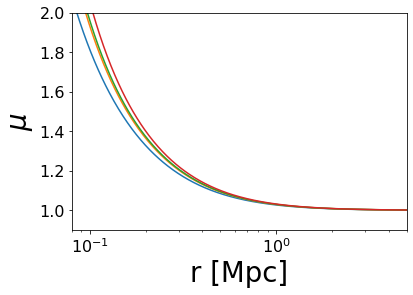

In [108]:
plot_profile(r3d, mu_2d[:,:], '$\\mu$')

plt.yscale('linear')
plt.xlim(0.08, 5)
plt.ylim(0.9, 2)

In [109]:
#define beta slope for each source population

mlim = np.linspace(20, 30, 100)

Mlim1 = mlim_to_Mlim(mlim, z_s[0], astropy_cosmology_object)
Mlim2 = mlim_to_Mlim(mlim, z_s[1], astropy_cosmology_object)
Mlim3 = mlim_to_Mlim(mlim, z_s[2], astropy_cosmology_object)
Mlim4 = mlim_to_Mlim(mlim, z_s[3], astropy_cosmology_object)

Mlim = np.linspace(-23, -18, 100)
mslope_z1 = slope(Mlim, alpha[0], mstar[0], fct=fct)
mslope_z2 = slope(Mlim, alpha[1], mstar[1], fct=fct)
mslope_z3 = slope(Mlim, alpha[2], mstar[2], fct=fct)
mslope_z4 = slope(Mlim, alpha[3], mstar[3], fct=fct)


(-23.84, -17.84)

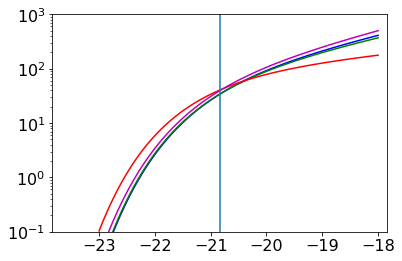

In [110]:
plt.semilogy(Mlim, schechterM(Mlim, 100, alpha[0], mstar[0]), 'b')
plt.semilogy(Mlim, schechterM(Mlim, 100, alpha[1], mstar[1]), 'g')
plt.semilogy(Mlim, schechterM(Mlim, 100, alpha[2], mstar[2]), 'r')
plt.semilogy(Mlim, schechterM(Mlim, 100, alpha[3], mstar[3]), 'm')

plt.axvline(mstar[0])

plt.ylim(1e-1, 1e3)
plt.xlim(mstar[0] - 3, mstar[0] + 3)

(-1, 2)

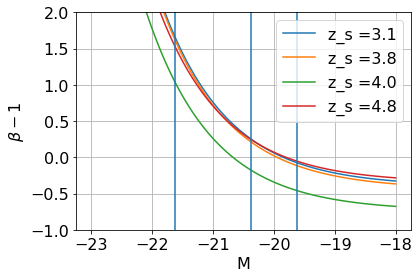

In [111]:
mlim = [24., 25.25, 26.]

Mlim1 = mlim_to_Mlim(mlim, z_s[0], astropy_cosmology_object)
Mlim2 = mlim_to_Mlim(mlim, z_s[1], astropy_cosmology_object)
Mlim3 = mlim_to_Mlim(mlim, z_s[2], astropy_cosmology_object)
Mlim4 = mlim_to_Mlim(mlim, z_s[3], astropy_cosmology_object)


plt.plot(Mlim, 2.5 * mslope_z1 - 1, label = 'z_s ='  + str(z_s[0]))
plt.plot(Mlim, 2.5 * mslope_z2 - 1, label = 'z_s ='  + str(z_s[1]))
plt.plot(Mlim, 2.5 * mslope_z3 - 1, label = 'z_s ='  + str(z_s[2]))
plt.plot(Mlim, 2.5 * mslope_z4 - 1, label = 'z_s ='  + str(z_s[3]))

for i in range(3):
    plt.axvline(Mlim1[i])

plt.xlabel('M')
plt.ylabel('$\\beta - 1$');
plt.legend()

plt.grid()
plt.ylim(-1,2)

In [112]:
Mlim[Mlim>Mlim1[0]][0]

-21.585858585858585

/pbs/throng/lsst/users/mricci/desc/Magnification_project/magnification_library.py:26: RuntimeWarning: invalid value encountered in power
  mu_bias = mu**(beta-1)
/pbs/throng/lsst/users/mricci/desc/Magnification_project/magnification_library.py:26: RuntimeWarning: invalid value encountered in power
  mu_bias = mu**(beta-1)
/pbs/throng/lsst/users/mricci/desc/Magnification_project/magnification_library.py:26: RuntimeWarning: invalid value encountered in power
  mu_bias = mu**(beta-1)


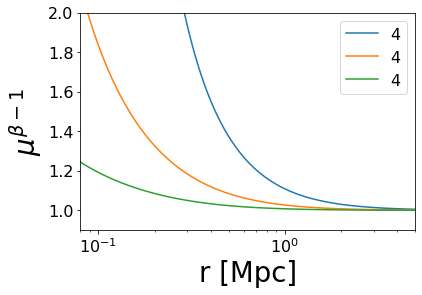

In [113]:
#plot_profile(r3d, mu_bias(mu_2d[:,0], 2.5 * mslope_z1[Mlim>Mlim1[0]][0]), '$\\mu^{\\beta - 1}$', label ='1')
#plot_profile(r3d, mu_bias(mu_2d[:,1], 2.5 * mslope_z2[Mlim>Mlim2[0]][0]), '$\\mu^{\\beta - 1}$', label ='2')
#plot_profile(r3d, mu_bias(mu_2d[:,2], 2.5 * mslope_z3[Mlim>Mlim3[0]][0]), '$\\mu^{\\beta - 1}$', label ='3')
plot_profile(r3d, mu_bias(mu_2d[:,3], 2.5 * mslope_z4[Mlim>Mlim4[0]][0]), '$\\mu^{\\beta - 1}$', label ='4')

#plot_profile(r3d, mu_bias(mu_2d[:,0], 2.5 * mslope_z1[Mlim>Mlim1[1]][0]), '$\\mu^{\\beta - 1}$', label ='1')
#plot_profile(r3d, mu_bias(mu_2d[:,1], 2.5 * mslope_z2[Mlim>Mlim2[1]][0]), '$\\mu^{\\beta - 1}$', label ='2')
#plot_profile(r3d, mu_bias(mu_2d[:,2], 2.5 * mslope_z3[Mlim>Mlim3[1]][0]), '$\\mu^{\\beta - 1}$', label ='3')
plot_profile(r3d, mu_bias(mu_2d[:,3], 2.5 * mslope_z4[Mlim>Mlim4[1]][0]), '$\\mu^{\\beta - 1}$', label ='4')

#plot_profile(r3d, mu_bias(mu_2d[:,0], 2.5 * mslope_z1[Mlim>Mlim1[2]][0]), '$\\mu^{\\beta - 1}$', label ='1')
#plot_profile(r3d, mu_bias(mu_2d[:,1], 2.5 * mslope_z2[Mlim>Mlim2[2]][0]), '$\\mu^{\\beta - 1}$', label ='2')
#plot_profile(r3d, mu_bias(mu_2d[:,2], 2.5 * mslope_z3[Mlim>Mlim3[2]][0]), '$\\mu^{\\beta - 1}$', label ='3')
plot_profile(r3d, mu_bias(mu_2d[:,3], 2.5 * mslope_z4[Mlim>Mlim4[2]][0]), '$\\mu^{\\beta - 1}$', label ='4')


plt.yscale('linear')
plt.xlim(0.08, 5)
plt.ylim(0.9, 2)

plt.legend()

In [114]:
def estimator(mu, beta):
    w =  mu**(beta - 1) - 1
    return w

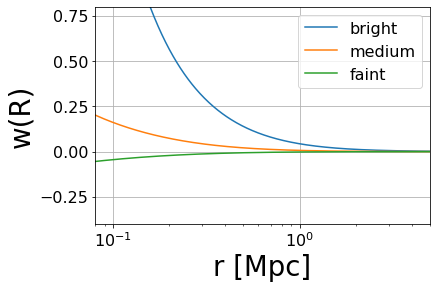

In [115]:


plot_profile(r3d, estimator(mu_2d[:,0], 2.5 * mslope_z1[Mlim>Mlim1[0]][0]), 'w(R)', label ='bright')

plot_profile(r3d, estimator(mu_2d[:,0], 2.5 * mslope_z1[Mlim>Mlim1[1]][0]), 'w(R)', label ='medium')

plot_profile(r3d, estimator(mu_2d[:,0], 2.5 * mslope_z1[Mlim>Mlim1[2]][0]), 'w(R)', label ='faint')


plt.yscale('linear')
plt.xlim(0.08, 5)
plt.ylim(-0.4 ,0.8)

plt.legend()
plt.grid()